# 

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#!/usr/bin/env python3
# Import file
data = pd.read_csv('/Users/jaylenroope/Downloads/nba_2008-2025.csv')

data

,season,date,regular,playoffs,away,home,score_away,score_home,q1_away,q2_away,...,ot_home,whos_favored,spread,total,moneyline_away,moneyline_home,h2_spread,h2_total,id_spread,id_total
0,2008,2007-10-30,True,False,por,sa,97,106,26,23,...,0,home,13.0,189.5,900.0,-1400.0,5.0,95.0,0.0,1
1,2008,2007-10-30,True,False,utah,gs,117,96,28,34,...,0,home,1.0,212.0,100.0,-120.0,3.0,105.5,0.0,1
2,2008,2007-10-30,True,False,hou,lal,95,93,16,27,...,0,away,5.0,199.0,-230.0,190.0,3.0,99.0,0.0,0
3,2008,2007-10-31,True,False,phi,tor,97,106,22,28,...,0,home,6.5,191.0,255.0,-305.0,2.0,96.5,1.0,1
4,2008,2007-10-31,True,False,wsh,ind,110,119,23,22,...,16,away,1.5,203.5,-125.0,105.0,1.0,105.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23113,2025,2025-06-11,False,True,okc,ind,107,116,32,28,...,0,away,4.5,225.5,NaN,NaN,NaN,NaN,0.0,0
23114,2025,2025-06-13,False,True,okc,ind,111,104,34,23,...,0,away,6.5,227.5,NaN,NaN,NaN,NaN,1.0,0
23115,2025,2025-06-16,False,True,ind,okc,109,120,22,23,...,0,home,8.5,223.5,NaN,NaN,NaN,NaN,1.0,1
23116,2025,2025-06-19,False,True,okc,ind,91,108,25,17,...,0,away,5.5,222.5,NaN,NaN,NaN,NaN,0.0,0


In [13]:
# I want to take data from after 2020 so we can see how if the algorithm has improved in the last 5 years. A scatterplot of spread vs actual score difference would be a good start. 

data_filtered = data[data['season'] >= 2020] 


# Return a new dataframe with only the columns 'away', 'home', 'score_away', 'score_home', and 'spread'
data_spread = data_filtered[['season','away', 'home', 'score_away', 'score_home', 'spread', 'whos_favored']]
data_spread


,season,away,home,score_away,score_home,spread,whos_favored
15521,2020,no,tor,122,130,6.5,home
15522,2020,lal,lac,102,112,3.5,away
15523,2020,det,ind,119,110,7.0,home
15524,2020,cle,orl,85,94,9.5,home
15525,2020,chi,cha,125,126,3.5,away
...,...,...,...,...,...,...,...
23113,2025,okc,ind,107,116,4.5,away
23114,2025,okc,ind,111,104,6.5,away
23115,2025,ind,okc,109,120,8.5,home
23116,2025,okc,ind,91,108,5.5,away


In [15]:
# I am creating a scatterplot of the spread vs the actual score difference to see if the sports betting algorithm has improved since 2020. Using the 'score_away', 'score_home', 'spread', and 'whos_favored' columns from the data_spread dataframe, I need to create a new column called actual_score_diff that is the difference between the away and home scores. However, the 'spread' doesn't specify which team is favored, so I need to use the 'whos_favored' column to determine which team is favored and adjust the actual_score_diff accordingly. If the 'whos_favored' column is 'away', then I will do score_away - score_home. If the 'whos_favored' column is 'home', then I will do score_home - score_away

def score_diff(row):
    if row['whos_favored'] == 'away':
        return row['score_away'] - row['score_home']
    elif row['whos_favored'] == 'home':
        return row['score_home'] - row['score_away']
    
data_spread['actual_score_diff'] = data_spread.apply(score_diff, axis=1)
data_score_diff = data_spread[['season', 'away', 'home', 'score_away', 'score_home', 'whos_favored','spread', 'actual_score_diff']]
data_score_diff

/var/folders/sq/lfj42cd94g3blqg9ggm6dy880000gn/T/ipykernel_118/3587686114.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spread['actual_score_diff'] = data_spread.apply(score_diff, axis=1)


,season,away,home,score_away,score_home,whos_favored,spread,actual_score_diff
15521,2020,no,tor,122,130,home,6.5,8
15522,2020,lal,lac,102,112,away,3.5,-10
15523,2020,det,ind,119,110,home,7.0,-9
15524,2020,cle,orl,85,94,home,9.5,9
15525,2020,chi,cha,125,126,away,3.5,-1
...,...,...,...,...,...,...,...,...
23113,2025,okc,ind,107,116,away,4.5,-9
23114,2025,okc,ind,111,104,away,6.5,7
23115,2025,ind,okc,109,120,home,8.5,11
23116,2025,okc,ind,91,108,away,5.5,-17


In [22]:
# Calculating how points off the spread was from the actual_score_diff and creating a new column called points_off_spread
data_score_diff['points_off_spread'] = data_score_diff['spread'] - data_score_diff['actual_score_diff'] 
data_score_diff

/var/folders/sq/lfj42cd94g3blqg9ggm6dy880000gn/T/ipykernel_118/3749932083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_score_diff['points_off_spread'] = data_score_diff['spread'] - data_score_diff['actual_score_diff']


,season,away,home,score_away,score_home,whos_favored,spread,actual_score_diff,points_off_spread
15521,2020,no,tor,122,130,home,6.5,8,-1.5
15522,2020,lal,lac,102,112,away,3.5,-10,13.5
15523,2020,det,ind,119,110,home,7.0,-9,16.0
15524,2020,cle,orl,85,94,home,9.5,9,0.5
15525,2020,chi,cha,125,126,away,3.5,-1,4.5
...,...,...,...,...,...,...,...,...,...
23113,2025,okc,ind,107,116,away,4.5,-9,13.5
23114,2025,okc,ind,111,104,away,6.5,7,-0.5
23115,2025,ind,okc,109,120,home,8.5,11,-2.5
23116,2025,okc,ind,91,108,away,5.5,-17,22.5


In [23]:
# Grouping the data by season and calculating the mean points_off_spread for each season
data_season = data_score_diff['points_off_spread'].groupby(data_score_diff['season']).mean().reset_index()

data_season

,season,points_off_spread
0,2020,0.815236
1,2021,-0.153715
2,2022,0.058289
3,2023,0.821591
4,2024,0.122062
5,2025,0.137396


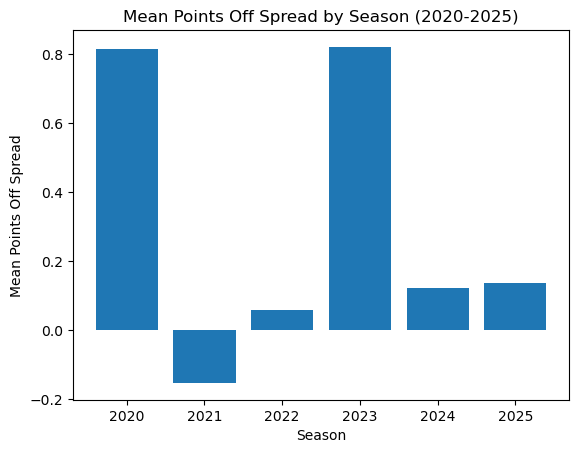

In [ ]:
# Using matplotlib to create a bar chart of the mean points_off_spread for each season
plt.bar(data_season['season'], data_season['points_off_spread'])
plt.xlabel('Season')
plt.ylabel('Mean Points Off Spread')
plt.title('Mean Points Off Spread by Season (2020-2025)')
plt.show()
# What this shows is that the sports betting algorithm has improved since 2020, where the average points off the spread was 0.82 in 2020 to 0.14 in 2025. In 2022, the algorithm predicted the score differential very well with a differential of only 0.06. However, overall, the algorithm tends to overestimate the spread.

In [ ]:
# Did the algorithm have a harder time predicting the spread for certain teams than others during 2020 to 2025?